In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import re

In [4]:
# set parameters
np.random.seed(0)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
data_dir = "C:/Users/Filip/Desktop/PW/2 semestr/Deep Learning/pro1"

batch_size = 1
epochs = 15

steps_per_epoch = 90000
steps_per_epoch = min(steps_per_epoch, 90000/batch_size)

In [61]:
x_batch, y_batch = next(train_generator)
print(f"Feature batch shape: {x_batch.shape}")
print(f"Label batch shape: {y_batch.shape}")


Feature batch shape: (1, 32, 32, 3)
Label batch shape: (1, 10)


In [5]:
# create generators for the training and test sets

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    
)
train_generator = datagen.flow_from_directory(
    data_dir + "/train",
    target_size=(32, 32),  # Resize images to this size
    batch_size=64,  # Number of images to load at each iteration
    class_mode="categorical",
)  # Type of classification ('binary' or 'categorical')

test_generator = datagen.flow_from_directory(
    data_dir + "/test",
    target_size=(32, 32),
    batch_size=64,
    class_mode="categorical",
)

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


IndexError: index 1 is out of bounds for axis 0 with size 1

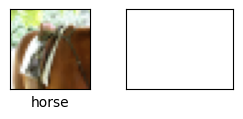

In [4]:
# # check if images are properly loaded
images, labels = next(train_generator)

# Plot the first 16 images of the batch
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    # Assuming 'classes' is a list of class names in the order they are indexed by the generator
    # Decode the one-hot encoded labels to find the class index, then get the class name
    plt.xlabel(classes[labels[i].argmax()])

plt.show()

In [28]:
# create cnn model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))


model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 and L2 regularization factors
l1_reg = 0.01   # Example value for L1 regularization
l2_reg = 0.01    # Example value for L2 regularization

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [9]:
# fit model
history_1 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 124s 87ms/step - loss: 137.8289 - accuracy: 0.1937 - val_loss: 122.3299 - val_accuracy: 0.3058
Epoch 2/20
1407/1407 [==============================] - 57s 41ms/step - loss: 108.3099 - accuracy: 0.2718 - val_loss: 94.1495 - val_accuracy: 0.3489
Epoch 3/20
1407/1407 [==============================] - 55s 39ms/step - loss: 81.8631 - accuracy: 0.3125 - val_loss: 69.8974 - val_accuracy: 0.3860
Epoch 4/20
1407/1407 [==============================] - 54s 39ms/step - loss: 59.9961 - accuracy: 0.3492 - val_loss: 50.6506 - val_accuracy: 0.4133
Epoch 5/20
1407/1407 [==============================] - 59s 42ms/step - loss: 43.2804 - accuracy: 0.3838 - val_loss: 36.4593 - val_accuracy: 0.4386
Epoch 6/20
1407/1407 [==============================] - 56s 40ms/step - loss: 31.1710 - accuracy: 0.4135 - val_loss: 26.3178 - val_accuracy: 0.4554
Epoch 7/20
1407/1407 [==============================] - 59s 42ms/step - loss: 22.5416 - accuracy: 0.4356 - v

In [72]:
history_1

In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 and L2 regularization factors
l1_reg = 0.001   # Example value for L1 regularization
l2_reg = 0.001    # Example value for L2 regularization

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [11]:
# fit model
history_2 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 55s 38ms/step - loss: 17.4366 - accuracy: 0.1996 - val_loss: 16.4368 - val_accuracy: 0.3098
Epoch 2/20
1407/1407 [==============================] - 55s 39ms/step - loss: 16.4515 - accuracy: 0.2723 - val_loss: 15.7754 - val_accuracy: 0.3566
Epoch 3/20
1407/1407 [==============================] - 54s 39ms/step - loss: 15.7318 - accuracy: 0.3138 - val_loss: 15.1528 - val_accuracy: 0.3816
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 15.0586 - accuracy: 0.3408 - val_loss: 14.5275 - val_accuracy: 0.4029
Epoch 5/20
1407/1407 [==============================] - 54s 38ms/step - loss: 14.4026 - accuracy: 0.3623 - val_loss: 13.9098 - val_accuracy: 0.4187
Epoch 6/20
1407/1407 [==============================] - 55s 39ms/step - loss: 13.7649 - accuracy: 0.3831 - val_loss: 13.3099 - val_accuracy: 0.4336
Epoch 7/20
1407/1407 [==============================] - 54s 38ms/step - loss: 13.1467 - accuracy: 0.4022 - val_l

In [12]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 and L2 regularization factors
l1_reg = 0.0001   # Example value for L1 regularization
l2_reg = 0.0001    # Example value for L2 regularization

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [13]:
# fit model
history_3 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 59s 41ms/step - loss: 4.1889 - accuracy: 0.2094 - val_loss: 3.3689 - val_accuracy: 0.3234
Epoch 2/20
1407/1407 [==============================] - 57s 40ms/step - loss: 3.6728 - accuracy: 0.2844 - val_loss: 3.2305 - val_accuracy: 0.3637
Epoch 3/20
1407/1407 [==============================] - 61s 43ms/step - loss: 3.4802 - accuracy: 0.3200 - val_loss: 3.1403 - val_accuracy: 0.3927
Epoch 4/20
1407/1407 [==============================] - 58s 41ms/step - loss: 3.3602 - accuracy: 0.3457 - val_loss: 3.0771 - val_accuracy: 0.4126
Epoch 5/20
1407/1407 [==============================] - 55s 39ms/step - loss: 3.2604 - accuracy: 0.3695 - val_loss: 3.0366 - val_accuracy: 0.4236
Epoch 6/20
1407/1407 [==============================] - 55s 39ms/step - loss: 3.1945 - accuracy: 0.3854 - val_loss: 2.9886 - val_accuracy: 0.4377
Epoch 7/20
1407/1407 [==============================] - 56s 40ms/step - loss: 3.1344 - accuracy: 0.3971 - val_loss: 2.9485 -

In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 and L2 regularization factors
l1_reg = 0.00001   # Example value for L1 regularization
l2_reg = 0.00001    # Example value for L2 regularization

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [15]:
# fit model
history_4 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 56s 39ms/step - loss: 2.9066 - accuracy: 0.2043 - val_loss: 2.1080 - val_accuracy: 0.3141
Epoch 2/20
1407/1407 [==============================] - 57s 40ms/step - loss: 2.3887 - accuracy: 0.2749 - val_loss: 1.9504 - val_accuracy: 0.3507
Epoch 3/20
1407/1407 [==============================] - 56s 40ms/step - loss: 2.1900 - accuracy: 0.3078 - val_loss: 1.8529 - val_accuracy: 0.3790
Epoch 4/20
1407/1407 [==============================] - 59s 42ms/step - loss: 2.0660 - accuracy: 0.3327 - val_loss: 1.7988 - val_accuracy: 0.3941
Epoch 5/20
1407/1407 [==============================] - 59s 42ms/step - loss: 1.9730 - accuracy: 0.3556 - val_loss: 1.7476 - val_accuracy: 0.4104
Epoch 6/20
1407/1407 [==============================] - 59s 42ms/step - loss: 1.9025 - accuracy: 0.3767 - val_loss: 1.7034 - val_accuracy: 0.4264
Epoch 7/20
1407/1407 [==============================] - 57s 40ms/step - loss: 1.8435 - accuracy: 0.3917 - val_loss: 1.6674 -

In [7]:
history_4

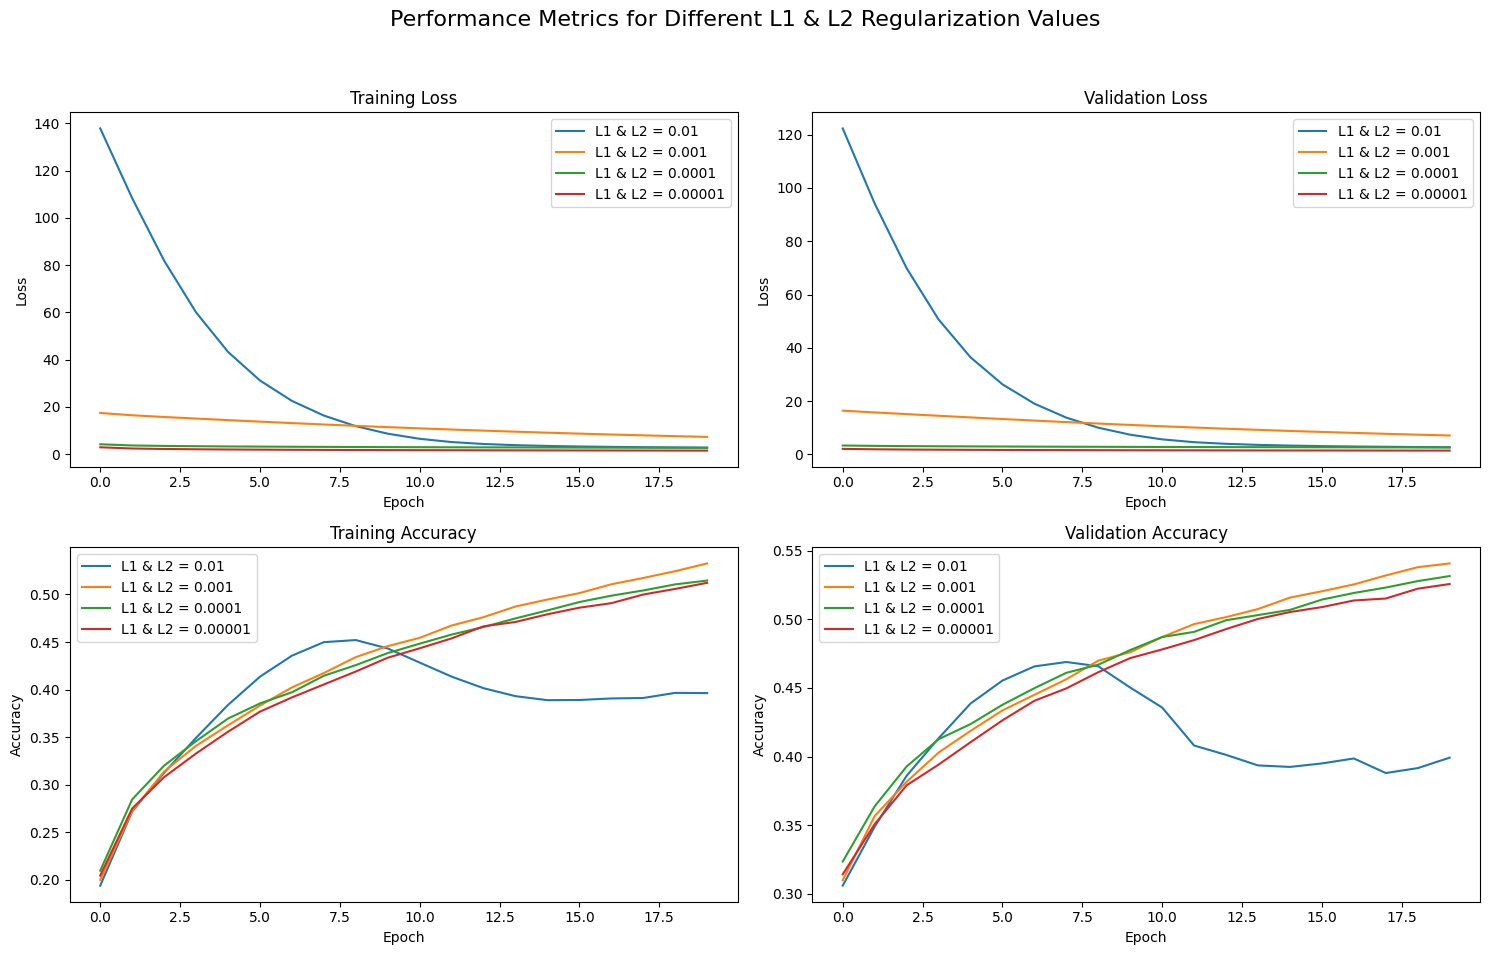

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Training Loss
axs[0, 0].plot(history_1.history['loss'], label='L1 & L2 = 0.01')
axs[0, 0].plot(history_2.history['loss'], label='L1 & L2 = 0.001')
axs[0, 0].plot(history_3.history['loss'], label='L1 & L2 = 0.0001')
axs[0, 0].plot(history_4.history['loss'], label='L1 & L2 = 0.00001')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plotting Validation Loss
axs[0, 1].plot(history_1.history['val_loss'], label='L1 & L2 = 0.01')
axs[0, 1].plot(history_2.history['val_loss'], label='L1 & L2 = 0.001')
axs[0, 1].plot(history_3.history['val_loss'], label='L1 & L2 = 0.0001')
axs[0, 1].plot(history_4.history['val_loss'], label='L1 & L2 = 0.00001')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plotting Training Accuracy
axs[1, 0].plot(history_1.history['accuracy'], label='L1 & L2 = 0.01')
axs[1, 0].plot(history_2.history['accuracy'], label='L1 & L2 = 0.001')
axs[1, 0].plot(history_3.history['accuracy'], label='L1 & L2 = 0.0001')
axs[1, 0].plot(history_4.history['accuracy'], label='L1 & L2 = 0.00001')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plotting Validation Accuracy
axs[1, 1].plot(history_1.history['val_accuracy'], label='L1 & L2 = 0.01')
axs[1, 1].plot(history_2.history['val_accuracy'], label='L1 & L2 = 0.001')
axs[1, 1].plot(history_3.history['val_accuracy'], label='L1 & L2 = 0.0001')
axs[1, 1].plot(history_4.history['val_accuracy'], label='L1 & L2 = 0.00001')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different L1 & L2 Regularization Values', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [97]:
# function for auto saving new models
def save_model_with_version(model, accuracy, base_path="models/cnn/"):
    pattern = r"v(\d+)"  # Regex to find version numbers
    max_version = 0
    
    # Check for existing models and find the highest version number
    if not os.path.exists(base_path):
        os.makedirs(base_path)
    for filename in os.listdir(os.path.dirname(base_path)):
        match = re.search(pattern, filename)
        if match:
            version = int(match.group(1))
            max_version = max(max_version, version)
    
    # Increment the version for the new model
    new_version = max_version + 1
    model_path = f"{base_path}cnn_v{new_version}_{round(accuracy,4)}.model"
    
    # Save the model
    model.save(model_path)
    print(f"Model saved as {model_path}")

In [98]:
#evaluate and save model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print(f"Loss: {loss}, Accuracy: {accuracy}")

save_model_with_version(model, accuracy)

1407/1407 [==============================] - 23s 16ms/step - loss: 1.5291 - accuracy: 0.4373
Loss: 1.5291271209716797, Accuracy: 0.4373222291469574
INFO:tensorflow:Assets written to: models/cnn/cnn_v4_0.4373222291469574.model/assets


INFO:tensorflow:Assets written to: models/cnn/cnn_v4_0.4373222291469574.model/assets


Model saved as models/cnn/cnn_v4_0.4373222291469574.model


In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 and L2 regularization factors
l1_reg = 0.001   # Example value for L1 regularization
l2_reg = 0.01    # Example value for L2 regularization

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [7]:
# fit model
history_5 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 125s 82ms/step - loss: 22.5297 - accuracy: 0.2117 - val_loss: 21.2090 - val_accuracy: 0.3145
Epoch 2/20
1407/1407 [==============================] - 95s 68ms/step - loss: 20.9976 - accuracy: 0.2803 - val_loss: 20.0738 - val_accuracy: 0.3583
Epoch 3/20
1407/1407 [==============================] - 56s 40ms/step - loss: 19.7679 - accuracy: 0.3168 - val_loss: 18.9173 - val_accuracy: 0.3893
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 18.5494 - accuracy: 0.3485 - val_loss: 17.7559 - val_accuracy: 0.4140
Epoch 5/20
1407/1407 [==============================] - 56s 39ms/step - loss: 17.3590 - accuracy: 0.3739 - val_loss: 16.6253 - val_accuracy: 0.4324
Epoch 6/20
1407/1407 [==============================] - 56s 40ms/step - loss: 16.2232 - accuracy: 0.3938 - val_loss: 15.5357 - val_accuracy: 0.4499
Epoch 7/20
1407/1407 [==============================] - 56s 40ms/step - loss: 15.1392 - accuracy: 0.4164 - val_

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 and L2 regularization factors
l1_reg = 0.001   # Example value for L1 regularization
l2_reg = 0.01    # Example value for L2 regularization

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [9]:
# fit model
history_6 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 58s 41ms/step - loss: 17.4673 - accuracy: 0.3348 - val_loss: 12.4338 - val_accuracy: 0.4527
Epoch 2/20
1407/1407 [==============================] - 56s 40ms/step - loss: 8.8882 - accuracy: 0.4639 - val_loss: 6.0808 - val_accuracy: 0.4714
Epoch 3/20
1407/1407 [==============================] - 55s 39ms/step - loss: 4.5031 - accuracy: 0.5230 - val_loss: 3.4670 - val_accuracy: 0.5298
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.9425 - accuracy: 0.5539 - val_loss: 2.6437 - val_accuracy: 0.5325
Epoch 5/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.3750 - accuracy: 0.5747 - val_loss: 2.3190 - val_accuracy: 0.5462
Epoch 6/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.1188 - accuracy: 0.5928 - val_loss: 2.0741 - val_accuracy: 0.5861
Epoch 7/20
1407/1407 [==============================] - 55s 39ms/step - loss: 1.9769 - accuracy: 0.6064 - val_loss: 2.0203

In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, regularizers

# Define the L1 and L2 regularization factors
l1_reg = 0.001   # Example value for L1 regularization
l2_reg = 0.01    # Example value for L2 regularization

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3), 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu", 
                  kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
    layers.Dense(10, activation="softmax", 
                 kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))
])
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [11]:
# fit model
history_7 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
1407/1407 [==============================] - 55s 38ms/step - loss: 4.3485 - accuracy: 0.3464 - val_loss: 4.1862 - val_accuracy: 0.1148
Epoch 2/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.5189 - accuracy: 0.3877 - val_loss: 2.8286 - val_accuracy: 0.2877
Epoch 3/20
1407/1407 [==============================] - 54s 39ms/step - loss: 2.4090 - accuracy: 0.3905 - val_loss: 2.5075 - val_accuracy: 0.3178
Epoch 4/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.3004 - accuracy: 0.3965 - val_loss: 2.6384 - val_accuracy: 0.2961
Epoch 5/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.2127 - accuracy: 0.4009 - val_loss: 2.4287 - val_accuracy: 0.3374
Epoch 6/20
1407/1407 [==============================] - 56s 39ms/step - loss: 2.1679 - accuracy: 0.3980 - val_loss: 2.3001 - val_accuracy: 0.3399
Epoch 7/20
1407/1407 [==============================] - 55s 39ms/step - loss: 2.1319 - accuracy: 0.3971 - val_loss: 2.8661 -